In [2]:
## Importing required packages
import pandas as pd 
import numpy as np 
import missingno as miss
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import DecisionTreeRegressor as DT_reg
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn import tree # For plotting the decision tree rules

# For evaluating our model's performance
import sklearn.metrics as m


# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

# Misc
import warnings
warnings.filterwarnings("ignore")

In [3]:
SP3 = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -1/Processed data - part 1/SP3_output.csv")
IV_data = pd.read_csv("C:/Users/VIOLIN/Desktop/Final-Project_Harshini-/Project Part -2/Processed data part2/IV_data.csv")

In [4]:
SP3.head()

,country,msw_year
0,Afghanistan,2313148.55
1,Albania,58955.00
2,Algeria,1397874.00
3,American Samoa,0.00
4,Angola,1316336.00


In [5]:
SP3.shape

(164, 2)

In [6]:
IV_data.head()

,country,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,Afghanistan,39,7474525.0,502.115487,8.401,25.754,1412.912141,2.340455e+07
1,Albania,50,1691769.0,5352.857411,30.705,61.229,9310.845162,1.201022e+09
2,Algeria,56,10827998.0,3948.343279,30.510,73.189,289.027090,1.381890e+09
3,American Samoa,1,12576.0,NaN,66.211,87.147,NaN,NaN
4,Andorra,1,22151.0,40886.391160,58.450,87.984,3984.194514,NaN


In [7]:
IV_data.shape

(177, 8)

In [8]:
SP3_model_data = pd.merge(SP3,IV_data,on = "country", how = "inner")

In [9]:
SP3_model_data.head()

,country,msw_year,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,Afghanistan,2313148.55,39,7474525.0,502.115487,8.401,25.754,1412.912141,2.340455e+07
1,Albania,58955.00,50,1691769.0,5352.857411,30.705,61.229,9310.845162,1.201022e+09
2,Algeria,1397874.00,56,10827998.0,3948.343279,30.510,73.189,289.027090,1.381890e+09
3,American Samoa,0.00,1,12576.0,NaN,66.211,87.147,NaN,NaN
4,Angola,1316336.00,33,11596932.0,2973.591160,10.435,66.177,5493.326925,-4.098479e+09


In [10]:
SP3_model_data.shape

(143, 9)

In [11]:
## Checking for missing values
# Checking any Missing Values
SP3_model_data.isnull().any()

country                         False
msw_year                        False
city_ascii                      False
population                      False
2019 GDP per capita              True
1960 urban population%           True
2019 urban population%           True
2014 usable water per capita     True
2019 FDI data                    True
dtype: bool

In [12]:
 #checking how much invalid data exists
    # to determine if data is valid
SP3_model_data.isnull().sum()

country                         0
msw_year                        0
city_ascii                      0
population                      0
2019 GDP per capita             9
1960 urban population%          2
2019 urban population%          1
2014 usable water per capita    9
2019 FDI data                   3
dtype: int64

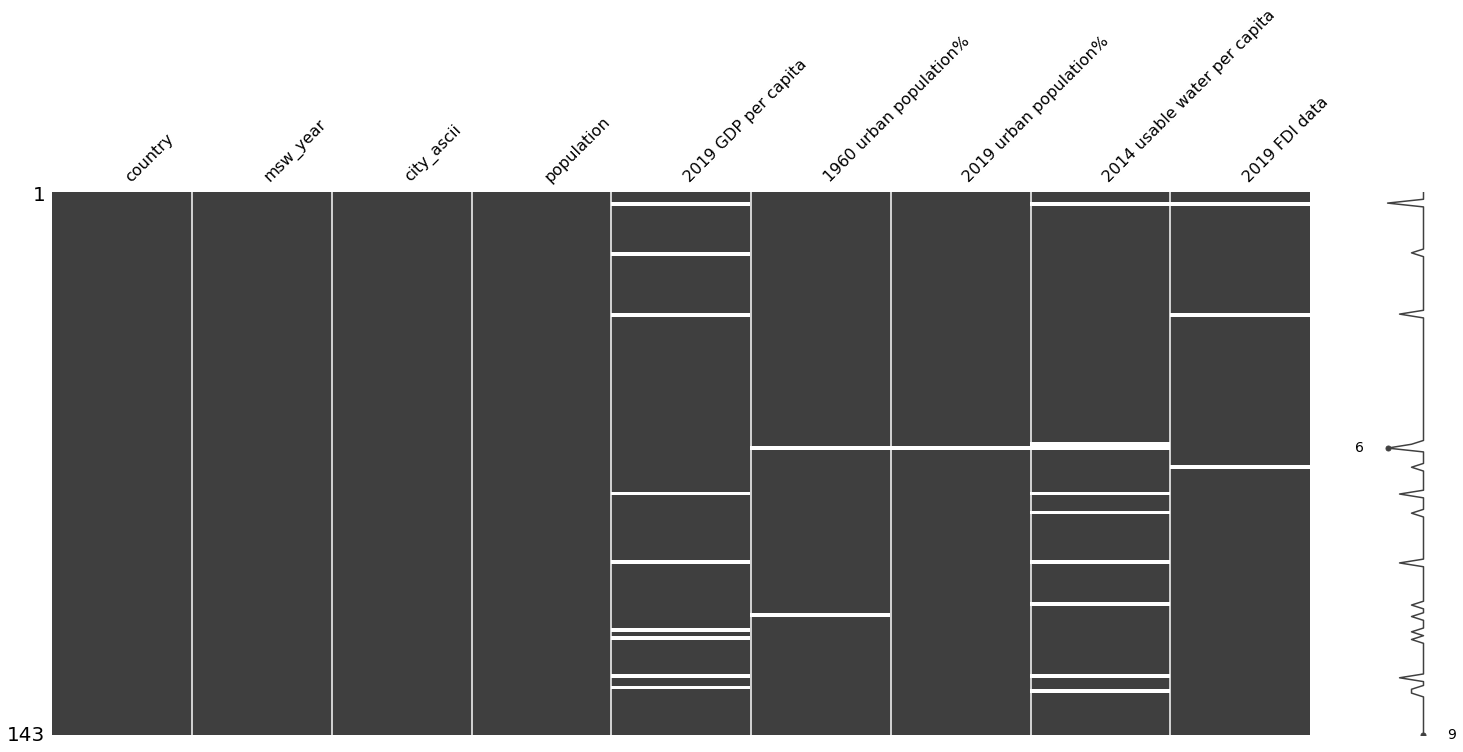

In [14]:
#Visually Checked to see the missing values
miss.matrix(SP3_model_data)

In [15]:
## Let us work on the missing values
SP3_model = SP3_model_data.dropna(axis='rows')
print(SP3_model)

         country    msw_year  city_ascii  population  2019 GDP per capita  \
0    Afghanistan  2313148.55          39   7474525.0           502.115487   
1        Albania    58955.00          50   1691769.0          5352.857411   
2        Algeria  1397874.00          56  10827998.0          3948.343279   
4         Angola  1316336.00          33  11596932.0          2973.591160   
5      Argentina  3459470.00         236  36172782.0         10006.148970   
..           ...         ...         ...         ...                  ...   
138   Uzbekistan   500000.00          55   8086374.0          1724.841134   
139      Vanuatu    27000.00           2     64834.0          3058.065675   
140      Vietnam  4909250.00          65  37934404.0          2715.276036   
141       Zambia   615979.40          34   4743400.0          1291.343357   
142     Zimbabwe   437146.50          24   3659454.0          1463.985910   

     1960 urban population%  2019 urban population%  \
0                   

In [16]:
SP3_model.dtypes

country                          object
msw_year                        float64
city_ascii                        int64
population                      float64
2019 GDP per capita             float64
1960 urban population%          float64
2019 urban population%          float64
2014 usable water per capita    float64
2019 FDI data                   float64
dtype: object

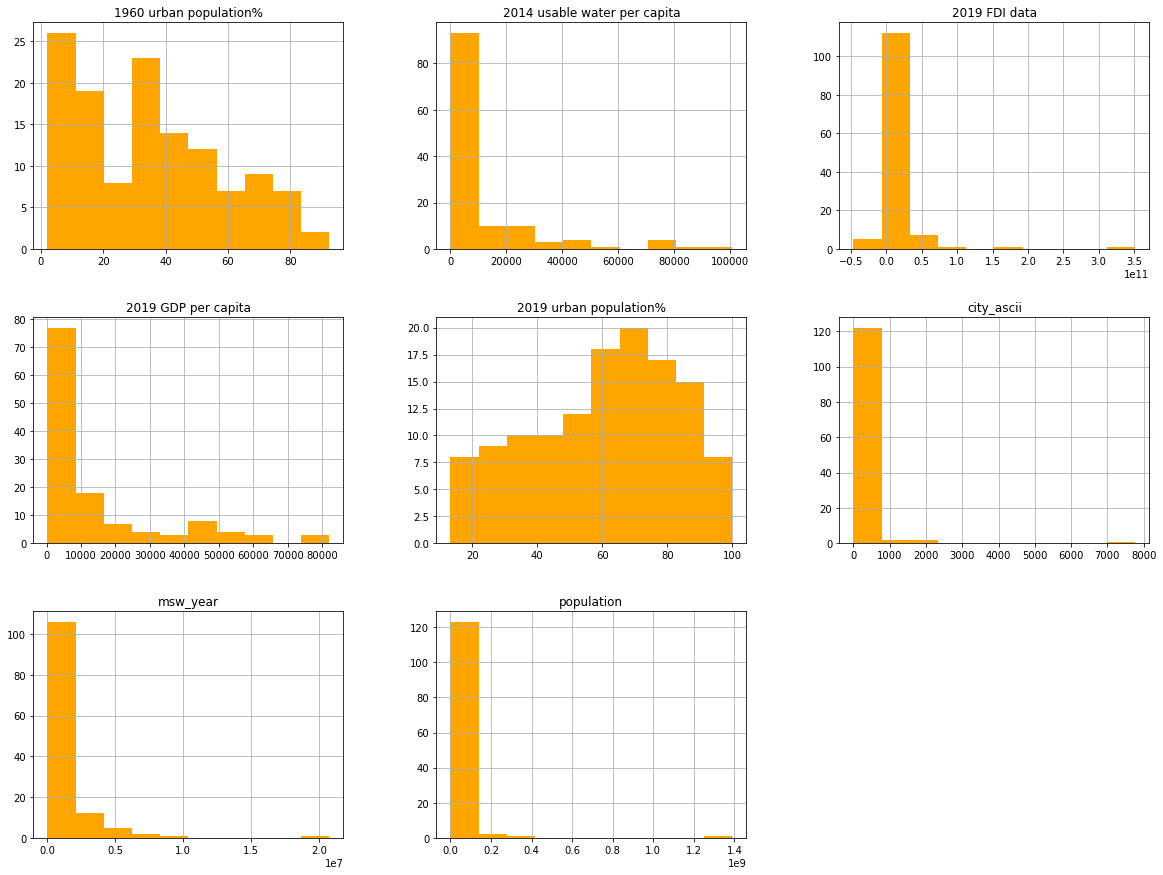

In [19]:
num_bins = 10

SP3_model.hist(bins = num_bins, figsize=(20,15),color = 'orange')
plt.savefig("HistogramPlots")
plt.show()

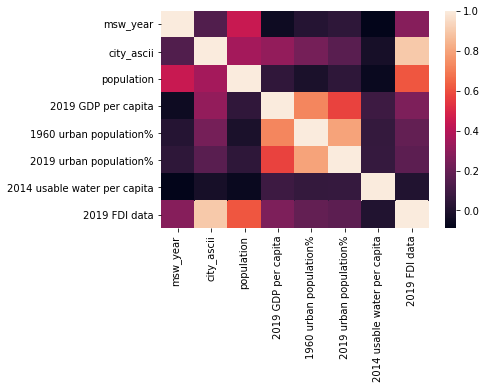

In [20]:
# Correlation between all the Parameters  
# if it is positive, the two variables tend to be high or low together
# If it is negative, the two variables tend to be opposite of each other
corr = SP3_model.corr()
# Correlation Plot
sns.heatmap(corr)

In [22]:
# Correlation Values of all the Features with respect to Target Variable 
## Top Values
print (corr['msw_year'].sort_values(ascending=False)[:10], '\n')

msw_year                        1.000000
population                      0.447467
2019 FDI data                   0.279829
city_ascii                      0.141694
2019 urban population%          0.043827
1960 urban population%          0.017792
2019 GDP per capita            -0.048147
2014 usable water per capita   -0.088730
Name: msw_year, dtype: float64 



In [24]:
y = SP3_model[['msw_year']]
X = SP3_model.drop(columns=['msw_year','country'])
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=123)

In [25]:
print(train_X.shape[0]/SP3_model.shape[0])
print(test_X.shape[0]/SP3_model.shape[0])

0.7480314960629921
0.25196850393700787


In [26]:
# Let's scale the data 
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [27]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,city_ascii,population,2019 GDP per capita,1960 urban population%,2019 urban population%,2014 usable water per capita,2019 FDI data
0,0.080340,0.027115,0.561998,0.741113,0.793968,0.797876,0.237226
1,0.000386,0.000169,0.284376,0.887811,0.886034,0.000000,0.119456
2,0.000515,0.001007,0.002976,0.169003,0.340175,0.226189,0.118014
3,0.000000,0.000030,0.128826,0.100638,0.314040,0.000655,0.119329
4,0.005021,0.005088,0.007295,0.048195,0.092799,0.012309,0.123409
...,...,...,...,...,...,...,...
90,0.001931,0.001048,0.006612,0.005786,0.047278,0.008474,0.118146
91,0.012360,0.015251,0.082176,0.494938,0.754602,0.541036,0.139418
92,0.001545,0.000855,0.004413,0.183165,0.446426,0.455128,0.117437
93,0.001931,0.001026,0.007458,0.343992,0.163595,0.076260,0.117626


In [29]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

In [30]:
use_metrics = ["neg_mean_squared_error"]

In [31]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [32]:
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [33]:

dt_scores = cross_validate(DT(),train_X,train_y, cv = fold_generator, scoring =use_metrics)